This exercise is for entire Dark Matter block and you have 2-weeks to finish it. We will guide you through the reference paper https://arxiv.org/pdf/2006.09721.pdf and reproduce the most important part of the results from the XENON1T direct DM search. 

# Understand the Physics:
*   What kind of signal XENON1T measures? What are S1 and S2 signals?
*   What are the most sensitive energy region of the XENON1T experiment?
*   What are the three mainly focused **signal hypothesis** of this paper? 
*   What is the main outcome of this paper? How the excess could be explained, it's that necessarily to be an axion? What you need to modify to the background hypothesis?


We restrict this exercise on $g_{ae}$ related analysis. 

*   What is $g_{ae}$? are all three hypothesis relevant to it?
*   Which physical scnarios (equations) one need for constraint of $g_{ae}$?



# Background model:
For the backgound model,  TABLE I. Summarises the all components in the background model $B_0$.

*  With help of TABLE I and FIG 3, explain how to generate a analytical continuous background energy spectra $B_0$?


Task 1: We provide the $B_0$ background spectrum data to spare the time of generation.  Now it's time for you to reproduce FIG 4.

Read necessary data from ***directSearch_data folder*** by pandas. First try **re-bin** the **unbinned data**. Then compare it with binned data. Are they looks same? If not, check your **normalisation** of y-axis unit.

In [1]:
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

from scipy import integrate
from scipy import optimize
from scipy import stats
from tqdm import tqdm

In [ ]:
B0_data = pd.read_csv("/content/sample_data/B0_1to30keV.txt", header=5)
# ...

In [ ]:
binned_data = 
#...

unbinned_data = 
#...
# you need to set lower and upper limit values to make interpolation happy
begin_row=[0.0, 0.0]
end_row=[30.0, 70.0]

In [ ]:
#plot b0, binned, unbinned

# Signal model:
Task 2: Assuming your injected signal comes from **2.3keV/$c^2$ ALP** with $g_{ae} = 2 ⋅ 10^{−13}$, reproduce FIG 11 Right. (You don't need to fit the parameter right now, just plot them.)

Be careful your background and signal should have the **same normalisation**.The paper abstract announce that the **(0,30)keV data were measured within 0.65 year.**

To convert the theoretical energy to the detector measured energy, one need to convolve theory model with the detector energy resolution and efficiency loss. This proceeding also called **smearing.** 

*   To calculate signal from ALP, you need photonelectric crosssection data from Xenon.
*   Which equation gives the energy resolution $σ(E)$?



In [ ]:
sigmape_data = 
#...

In [ ]:
# you can use exercise_classes.py for help, which gives you a truncated gaussian distribution,
# or defin your energy resolution function here 
g_ae=2e-13
m_alp=20
A=131

def cross_section(E):
  return ...

def energy_resolution(E):
  #...
  return sigma

def event_rate(E,g):
    R=...
    return

In [ ]:
#plot fig 11 right

# Likelihood function:
Now we construct the likelihood function use **unbinned likelihood**.
If you are not familiar with likelihood, think through following question may help you on the construction.


---
1.   The Likelihood function has the form similar to the Eq(15).For this simplified exercise we ignore $C_{\mu}$ and $C_{\theta}$ part. Then the simplified Likelihood function consists of 3 parts: **poisson pdf $\times$ (background pdf + signal pdf)**
2.   Every pdf need to be normalized on their own. The poisson pdf is already normalized. The signal pdf (which is a normal distribution, as shown in last task) is easy to normalized. You need to generate a background pdf with $B_0$ distribution from task 1 and make sure it is normalized. You can always check if your pdf construction is correct by integrate you pdf from (0,30) keV with *scipy.integrate.quad*, and it should give back a value very close to 1.
3. The factor $\frac{\mu_b}{\mu_{tot}}$ and $\frac{\mu_s}{\mu_{tot}}$ is to normalised the combined pdf. In our case we don't have index $j$ because our $B_0$ is a whole.
4. Maximize likelihood is equivalent to minimize log-likelihood. Use **negative log likelihood** instead of likelihood, so you can do sum instead of multiply and apply scipy.optimize.minimize easily (scipy doesn't have maximize function).
---

Task 3. Define your **log-likelihood** with dependence of events number, background number and mass of ALP (namely $\mu_b$,$\mu_b$ and $m_{alp}$) , find the best fit value.

In [ ]:
#B0 curve as bkg pdf
pdf_B0 = ...

In [ ]:
#unbinned

def pdf_bkg:
  return ...

def pdf_sig:
  return ...

# def total_pdf:
#     return ...

# def total_event:
#     return ...

def n_log_likelihood:
  return ...

3719.6741244406576 3729.1929217740103


Your bkg events number, signal events number and best fit mass should be around:\( 1.237e+03, 3.418e+01, 2.415e+00\)

Text(0, 0.5, 'log-likelihood')

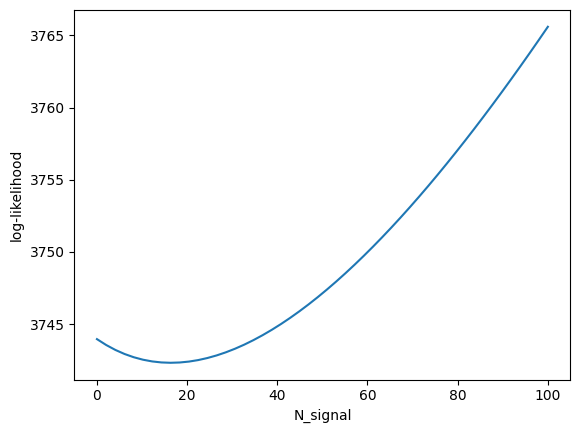

In [ ]:
# plot your likelihood vs events number curve

# Likelihood ratio(Test Statistics)
Task 4: Define your **Likelihood ratio q** as Eq(17). Reproduce the FIG 11 Left. Recall the knowlegde of **critial value** , **confidence level** and **degree of freedom**. Notice that the paper use ALP mass as x-axis while we have multipy fit parameters for Likelihood function. 


*   The FIG 11 shows an asymptotic 68% C.L (How much sigma is it?)
Beside 68% C.L., you should also plot 90% C.L. band(how much is the corresponding critical value?) and give back the **events number upper limit of 90% C.L.** 

For small masses, you will get two crossing point, one takes the larger crossing point as upper limit. For large masses, you will only get one crossing point and best fit **could be zero**.


Your plot and best fit value should be similar but **not exactly** as same as figure 11. What could be the reason of this difference?


In [ ]:
def q():
  return ...

[42 90]


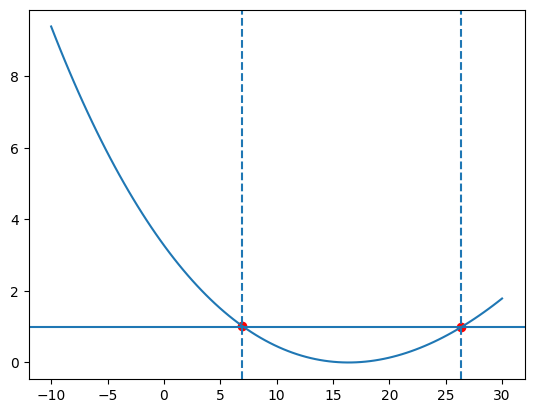

In [ ]:
CL_90_line = ...
#plot your q curve and find upper limit value.

# Constraint of parameter:
Previously we fixed the injected signal mass at 2.3keV. Now we need to scan the ALP mass range (0,30) keV. For each mass, we got a upper limit of events number. This technology called **likelihood-profiling**.

Task 5: try to reproduce FIG 11 Top, which shows the upper limit of $g_{ae}$ as function of ALP mass. You need write an auxiliary function to convert event number $\mu_s$ to the coupling constant $g_{ae}$

*   Why the C.L. contour is not smooth? Where we loss/gain the significant and what are the reasons for that?

In [ ]:
def convert_to_g_ae:
    return ...

In [ ]:
#you need to scan m_alp (0,30) at this step
def constraint_gae:
  return ...

In [ ]:
limits_data = pd.read_csv("/content/sample_data/bosonic_dm_limits.txt", header=5)
limits_data.columns = ['mass [kev/c2]', 'gae', 'kappa']

In [ ]:
#plot and compare your constraint g_ae with paper results.

# Just for thinking: 

Solar axion is a more complicated case, where the parameters space is 3D.

*   Which are three dimensions?
*   What is 90% C.L. in 3D case?

# You need submit the solution of every exercise to get 0.3 bonus. 
# You can upload your notebook to the "students solution" folder.